In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import subprocess

import sys
from copy import copy
import scipy
import imageio
sys.path.append("../")
import itertools
from scipy.stats import norm
import matplotlib.mlab as mlab
from mvgavg import mvgavg
import json
import matplotlib.patches as mpatches
from matplotlib import gridspec
import matplotlib.patches as mpatch
from lovely_numpy import lo

from matplotlib.ticker import FormatStrFormatter


save_folder = "G:/DREAM/from_github/thesis/Figures/LDA/"
import seaborn as sns

from random import randrange
from joblib import wrap_non_picklable_objects


from alienlab import utils
import alienlab
from alienlab import regression_func
import pickle as pk
from alienlab import plot
from activation_experiment import activation_experiment


from scipy.stats.stats import pearsonr


import skimage.registration


from useful_func import dtw, get_path, plot_warped_timeseries
from useful_func import spectrum_a, spectrum_d
from useful_func import residuals, exp_decay, get_fit, sigmoid, exp_decay_max
from useful_func import gradient_magnitude, gradient_orientation, gaussian_kernel, assign_orientation, crop_center, cconv, get_algae_im
from numpy import genfromtxt

from joblib import Parallel, delayed
from useful_func import make_svm, make_pca
from sklearn.decomposition import PCA

from mpl_toolkits.axes_grid1 import make_axes_locatable



import sklearn
import sklearn.discriminant_analysis
import pandas as pd


import skimage

from useful_func import fit_biexp, fit_exp, fit_monoexp

import tifffile as tiff
import random
import matplotlib
%matplotlib widget


import alienlab.plot

p = alienlab.plot.PlotFigure()
p.extension = ".pdf"
p.date = False
p.figsize = (10,10)
p.fonttick=12
p.fontsize=18
p.save_folder = "G:/DREAM/from_github/Single_cell_paper/Figures/"



C:\Users\Alienor\AppData\Local\Temp\ipykernel_26028\1219060640.py:40: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
data_folder = "plotly_data/"


traces_list = np.load(data_folder + 'traces_list.npy') # pulses
pulses = np.load(data_folder + 'pulses_list.npy')
Z = {}
method_list = ['combine0', 'combine1', 'combine2', 'combine3', 'combine4', "pulses"]
for method in method_list:
    Z[method] = np.load(data_folder + method + "_array_proj.npy") # projections des dictionnaires 3D résultat LDA
    
label_list = np.load(data_folder + 'label_list.npy') #0_0_0
algae_list = np.load(data_folder + 'algae_list.npy')
imref_list = np.load(data_folder + 'imref_list.npy')
mask_list = np.load(data_folder + 'mask_list.npy')
time_list = np.load(data_folder + 'time_list.npy')
time_list -= time_list[:,0:1]
time_pulses = time_list[:,250::20]

class_match = json.load(open(data_folder + "class_match.json"))
description_match = json.load(open(data_folder + "description_match.json"))


colmap = json.load(open(data_folder + "color_map.json"))# colormap 
colmap = {int(k):v for k,v in colmap.items()}
id_list = np.load(data_folder + 'id_list.npy') #1 per 0_0_0
exp_array = np.load(data_folder + 'exp_list.npy')

lims = {}
for method in method_list:
    lims[method] = json.load(open(data_folder + method + "_array_ax_lim.json"))

    
TEI = ["qT", "qE", "qI"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1655


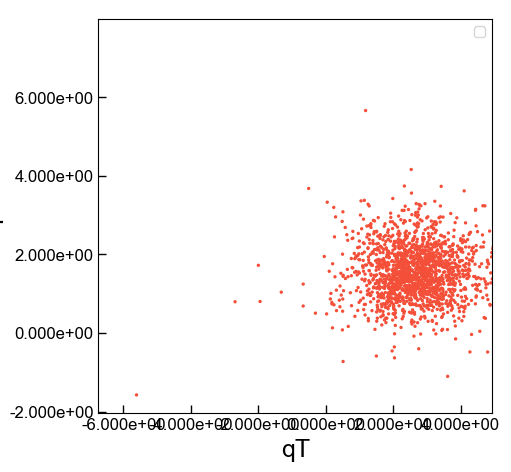

In [3]:
def cmap_from_plt(cmap, N):
    cmap = matplotlib.colormaps[cmap]
    start = N//2
    cmap = cmap(np.linspace(0, 1, N+start))
    cmap = cmap[start:]
    random.seed(4)
    random.shuffle(cmap)
    #plt.figure()
    #u = np.tile(cmap[:,:3], (1, 1, 1))
    #plt.imshow(u)
    #plt.axis('off')
    return cmap


def generate_col(N): #colormap
    color_condition = {}
    
    color_condition["0_0_0"] = cmap_from_plt("Purples", N)

    color_condition["1_0_0"] = cmap_from_plt("Greys", N)
    color_condition["2_0_0"] = cmap_from_plt("Greys", N)
    color_condition["2_0_0"] = cmap_from_plt("Greys", N)
        
    color_condition["0_0_1"] = cmap_from_plt("Blues", N)
    color_condition["0_0_2"] = cmap_from_plt("Blues", N)
    color_condition["0_0_3"] = cmap_from_plt("Blues", N)
    
    color_condition["0_1_3"] = cmap_from_plt("Oranges", N)
    color_condition["0_1_2"] = cmap_from_plt("Oranges", N)

    color_condition["1_0_2"] = cmap_from_plt("Greens", N)
    color_condition["1_0_3"] = cmap_from_plt("Greens", N)
    color_condition["2_0_2"] = cmap_from_plt("Greens", N)
    color_condition["2_0_3"] = cmap_from_plt("Greens", N)
    
    color_condition["1_1_2"] = cmap_from_plt("Reds", N)
    color_condition["1_1_3"] = cmap_from_plt("Reds", N)
    
    color_condition["9_1_0"] = cmap_from_plt("Reds", N)
    color_condition["9_1_1"] = cmap_from_plt("Reds", N)
    color_condition["9_1_2"] = cmap_from_plt("Reds", N)
    color_condition["9_1_3"] = cmap_from_plt("Reds", N)
    color_condition["9_2_0"] = cmap_from_plt("Reds", N)
    color_condition["9_2_1"] = cmap_from_plt("Reds", N)
    color_condition["9_2_2"] = cmap_from_plt("Reds", N)
    color_condition["9_2_3"] = cmap_from_plt("Reds", N)
    color_condition["9_3_0"] = cmap_from_plt("Reds", N)
    color_condition["9_3_1"] = cmap_from_plt("Reds", N)
    color_condition["9_3_2"] = cmap_from_plt("Reds", N)
    color_condition["9_3_3"] = cmap_from_plt("Reds", N)

    color_condition["9_0_1"] = cmap_from_plt("Oranges", N)   
    color_condition["9_0_2"] = cmap_from_plt("Oranges", N)
    color_condition["9_0_3"] = cmap_from_plt("Oranges", N)
    
    color_condition["3_0_2"] = cmap_from_plt("terrain", N)
    color_condition["3_0_3"] = cmap_from_plt("terrain", N)
    
    return color_condition

def create_fig(data, method, x, y, color_condition, fig, markersize = 2):
    X0 = traces_list[data]
    Z0 = Z[method][data]
    label_list0 = label_list[data]
    id_list0 = id_list[data]
    algae_list0 = algae_list[data]

    class_color = np.zeros((len(label_list0),4)).astype(str)
    for i, c in enumerate(np.unique(label_list0)):
        pos = label_list0 == c
        class_color[label_list0 == c] = color_condition[c][id_list0[pos]%10]
    plt.scatter(x = Z0[:,x], y = Z0[:,y], c=class_color, s= markersize)#id_list0.astype(str))#, color_discrete_sequence=colmap)
    plt.xlim(lims[method]["%d,%d"%(x,y)][0])
    plt.ylim(lims[method]["%d,%d"%(x,y)][1])
    plt.xlabel(TEI[x])
    plt.ylabel(TEI[y])
    plt.legend()

    return fig

color_condition = generate_col(10)

idxs = exp_array==30

for u in ["9_1_3"]:#, "9_2_3", "9_3_3"]:
    fig = p.set_figure()
    data = idxs*(label_list==u)
    create_fig(data, "combine4", 0, 1, color_condition, fig, markersize = 2)
    print(np.sum((data)))

In [4]:
idxs

array([False, False, False, ...,  True,  True,  True])

1552

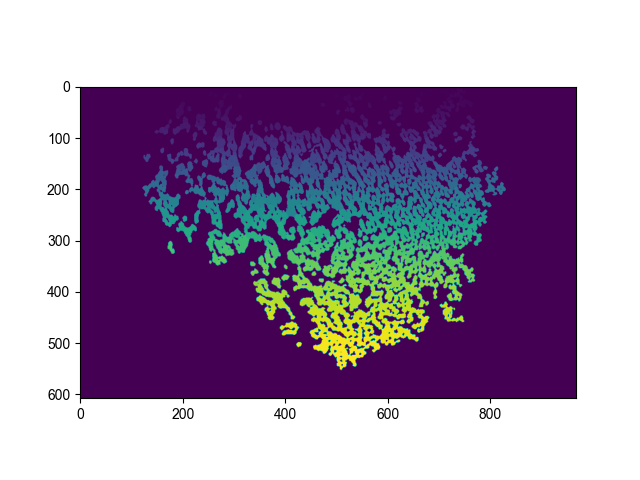

In [5]:
plt.figure()
positions  = mask_list[457] #480
plt.imshow(positions)
len(np.unique(positions))

In [6]:
imap = np.load("../FOLDER_2022_12_20_CC124_synchro_radio_2h/2022-12-20_10_48_D2_calib_video/I_480_map.npy")

(array([8.70000e+01, 2.84000e+02, 7.79000e+02, 1.97500e+03, 4.85100e+03,
        1.35800e+04, 3.44710e+04, 7.10180e+04, 1.65069e+05, 1.62624e+05]),
 array([  42.86166522,  991.56136907, 1940.26107293, 2888.96077678,
        3837.66048063, 4786.36018448, 5735.05988833, 6683.75959218,
        7632.45929603, 8581.15899988, 9529.85870373]),
 <BarContainer object of 10 artists>)

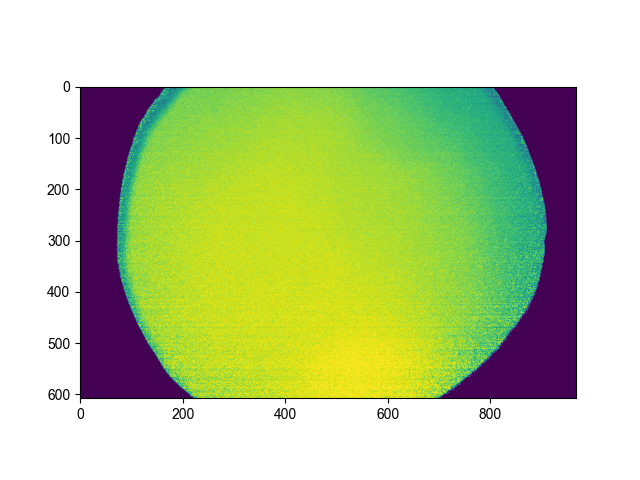

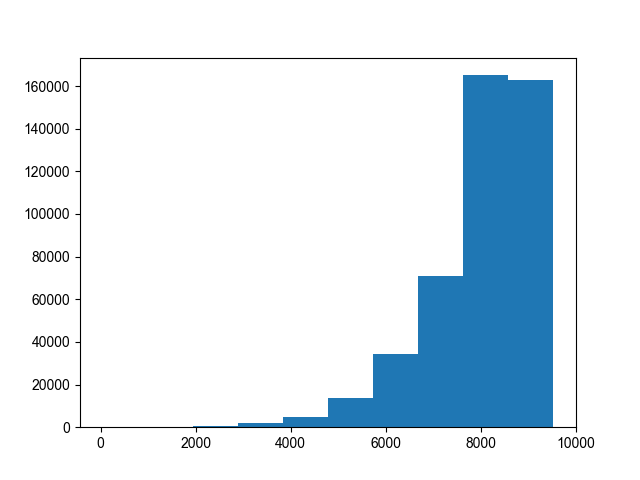

In [7]:
M = np.quantile(imap, 0.95)
m = np.quantile(imap, 0.05)
imap[imap>M]=M
imap[imap<m]=m

plt.figure()
plt.imshow(imap)

plt.figure()
plt.hist(imap[imap>m].flatten())

In [8]:
algae = algae_list[data]
num = []
inte = []
for pos in algae:
    val = imap[positions==pos]
    val = np.mean(val)
    num.append(pos)
    inte.append(val)
    

C:\Users\Alienor\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alienor\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
len(algae)

1655

(array([  3.,  18.,  27.,  46.,  79., 188., 382., 509., 272.,  28.]),
 array([5546.34448798, 5944.69590956, 6343.04733113, 6741.39875271,
        7139.75017428, 7538.10159586, 7936.45301743, 8334.80443901,
        8733.15586058, 9131.50728216, 9529.85870373]),
 <BarContainer object of 10 artists>)

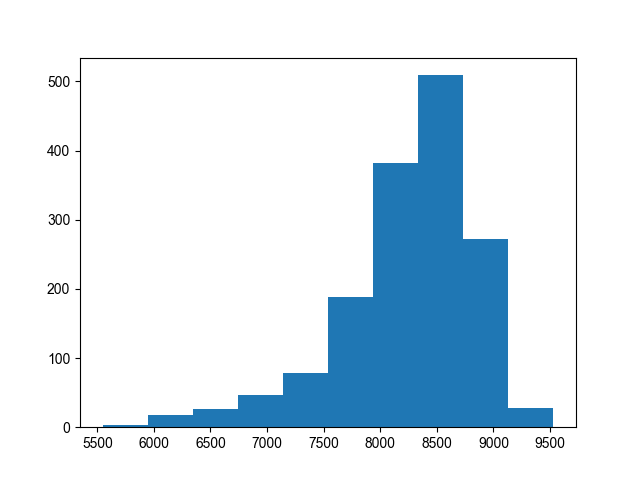

In [10]:
plt.figure()
plt.hist(inte)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


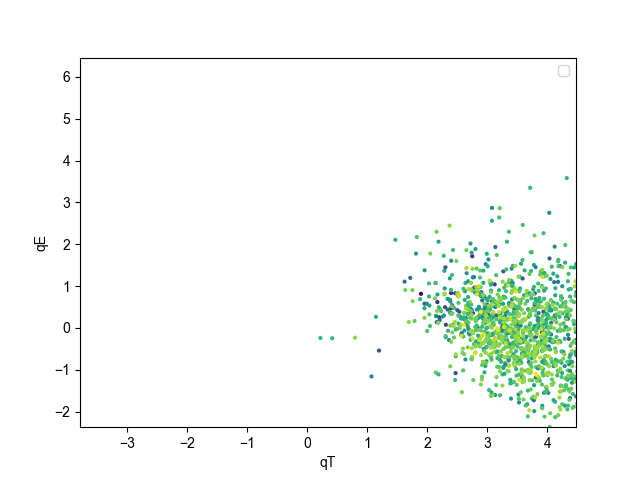

In [11]:
X0 = traces_list[data]
Z0 = Z[method][data]
label_list0 = label_list[data]
id_list0 = id_list[data]
algae_list0 = algae_list[data]
x,y = 0,1

plt.figure()
plt.scatter(x = Z0[:,x], y = Z0[:,y], c=inte, s= 4)#id_list0.astype(str))#, color_discrete_sequence=colmap)
plt.xlim(lims[method]["%d,%d"%(x,y)][0])
plt.ylim(lims[method]["%d,%d"%(x,y)][1])
plt.xlabel(TEI[x])
plt.ylabel(TEI[y])
plt.legend()


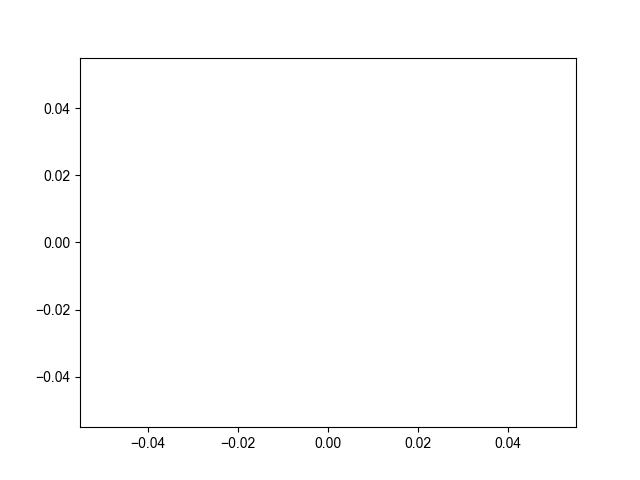

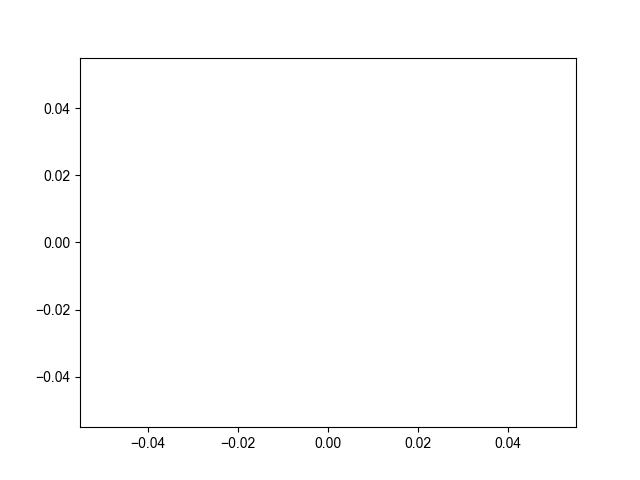

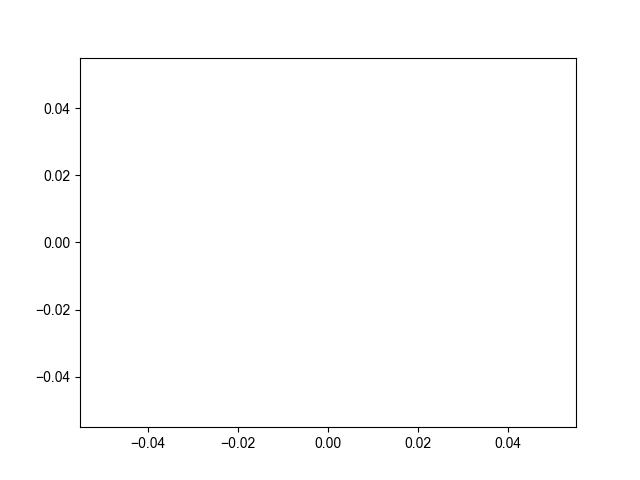

In [12]:
idxs = (exp_array==29) + (exp_array==30) + (exp_array==27)
data = idxs * (label_list=="2_0_0")
Z0 = Z[method][data]
for i in range(3):
    
    algae = algae_list[data]
    num = []
    inte = []
    for pos in algae:
        val = imap[positions==pos]
        val = np.mean(val)
        num.append(pos)
        inte.append(val)
    plt.figure()
    plt.plot(Z0[:,i], inte, '.')

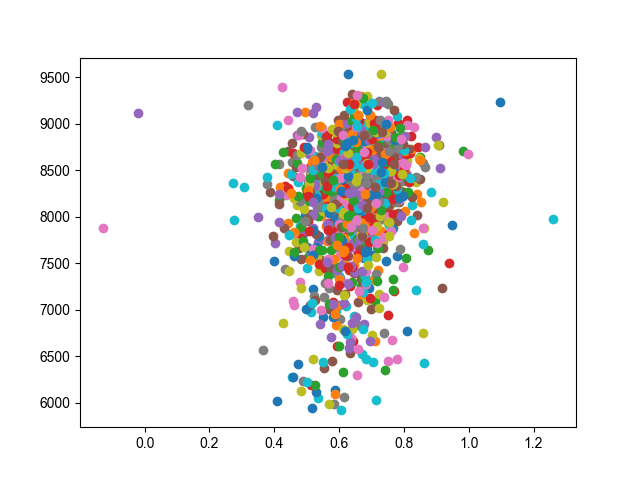

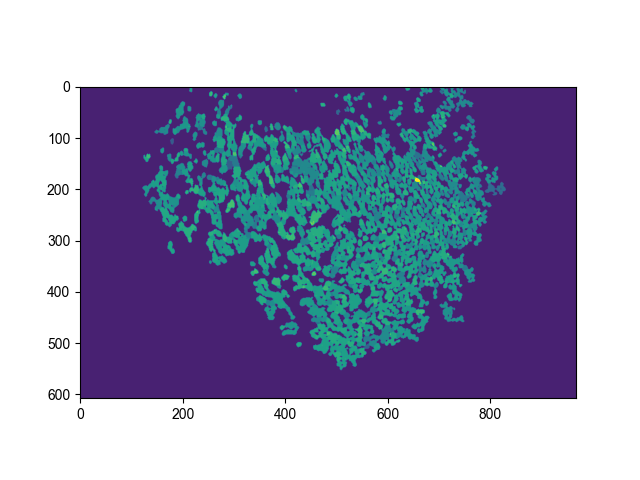

In [13]:
folder = "G:/DREAM/from_github/PAMFluo/Experiments/FOLDER_2022_12_20_CC124_synchro_radio_2h/2022-12-20_12_39_qE_calib_0/"

data = np.load(folder + "items_dict.npy", allow_pickle = True).item()
plt.figure()
mask = data['labels']
im = np.zeros(mask.shape)
for k in data["items_dict"].keys():
    x = data["items_dict"][k]["mean"]
    y = np.mean(imap[mask==int(k)])
    qE = (x[250]-x[2050])/x[2050]
    im[mask==int(k)]=qE
    plt.scatter(qE,y)
    
plt.figure()
plt.imshow(im)

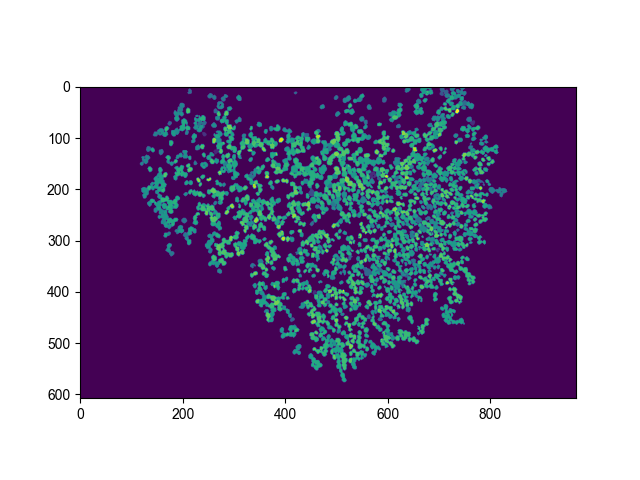

In [14]:
folder = "G:/DREAM/from_github/PAMFluo/Experiments/FOLDER_2023_01_10_wt4_synchro_sandrine_2H/2023-01-10_20_30_qE_calib_1/"
folder = "G:/DREAM/from_github/PAMFluo/Experiments/FOLDER_2022_12_20_CC124_synchro_radio_2h/2022-12-20_21_22_qE_calib_1/"

data = np.load(folder + "items_dict.npy", allow_pickle = True).item()
plt.figure()
mask = data['labels']
im = np.zeros(mask.shape)
for k in data["items_dict"].keys():
    x = data["items_dict"][k]["mean"]
    qE = (x[250]-x[270])/x[270]
    im[mask==int(k)]=qE
plt.imshow(im)

0
0
0
0
489
1655
0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


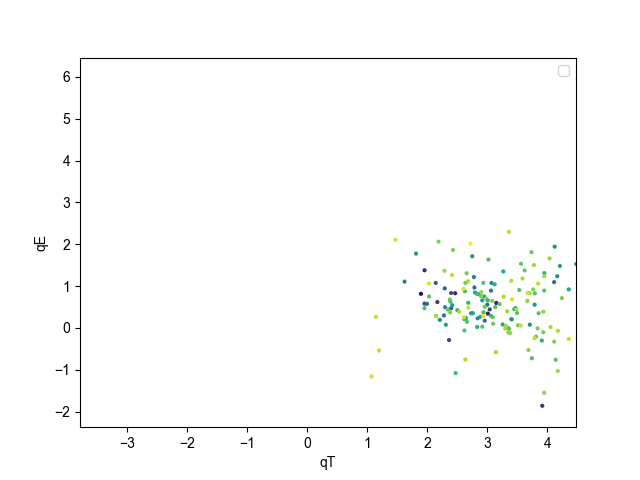

In [15]:



for u in ["1_1_3", "2_1_3","3_1_3","7_1_3","8_1_3","9_1_3","10_1_3",]:
    #fig = p.set_figure("%d", "%d")
    
    datat = idxs*(label_list==u)
    print(np.sum(datat))
    if np.sum(datat)>0:
        data=datat
    #create_fig(data, "combine4", 0, 1, color_condition, fig, markersize = 2)

#plt.figure()
positions  = mask_list[id_list[idxs][0]]
#plt.imshow(positions)

imap = np.load("../FOLDER_2022_12_20_CC124_synchro_radio_2h/2022-12-20_10_48_D2_calib_video/I_480_map.npy")

M = np.quantile(imap, 0.95)
m = np.quantile(imap, 0.05)
imap[imap>M]=M
imap[imap<m]=m

#plt.figure()
#plt.imshow(imap)

algae = algae_list[data]
num = []
inte = []
for pos in algae:
    val = imap[positions==pos]
    val = np.mean(val)
    num.append(pos)
    inte.append(val)
    
#plt.figure()
#plt.hist(inte)

X0 = traces_list[data]
Z0 = Z[method][data]
label_list0 = label_list[data]
id_list0 = id_list[data]
algae_list0 = algae_list[data]
x,y = 0,1

plt.figure()
plt.scatter(x = Z0[:,x], y = Z0[:,y], c=inte, s= 4)#id_list0.astype(str))#, color_discrete_sequence=colmap)
plt.xlim(lims[method]["%d,%d"%(x,y)][0])
plt.ylim(lims[method]["%d,%d"%(x,y)][1])
plt.xlabel(TEI[x])
plt.ylabel(TEI[y])
plt.legend()
